In [5]:
import random
import pandas as pd

def generar_red(num_nodos=10, densidad=0.3, distancia_min=1, distancia_max=100, guardar_csv=True):
    """
    Genera un dataset sintético de una red con nodos y arcos.
    
    Args:
        num_nodos (int): Número de nodos en la red.
        densidad (float): Probabilidad de que exista un arco entre dos nodos (0 a 1).
        distancia_min (int): Distancia mínima entre nodos.
        distancia_max (int): Distancia máxima entre nodos.
        guardar_csv (bool): Si se guarda el dataset en un archivo CSV.
    
    Returns:
        pd.DataFrame: DataFrame con las conexiones entre nodos y sus costos.
    """
    # Lista de nodos
    nodos = list(range(num_nodos))
    
    # Lista para almacenar los arcos
    arcos = []
    
    # Generar arcos con probabilidades según la densidad
    for origen in nodos:
        for destino in nodos:
            if origen != destino and random.random() < densidad:
                # Generar un costo aleatorio para el arco
                costo = random.randint(distancia_min, distancia_max)
                arcos.append((origen, destino, costo))
    
    # Crear un DataFrame para organizar los datos
    df = pd.DataFrame(arcos, columns=['origen', 'destino', 'costo'])
    
    # Guardar en CSV si es necesario
    if guardar_csv:
        df.to_csv('../data/synthetic/red.csv', index=False)
        print("Dataset guardado como 'red.csv'")
    
    return df

# Ejemplo de uso
dataset = generar_red(num_nodos=15, densidad=0.4, distancia_min=10, distancia_max=500)
print(dataset)



Dataset guardado como 'red.csv'
    origen  destino  costo
0        0        3    475
1        0        6    301
2        0       12     37
3        1        0    270
4        1        6    182
..     ...      ...    ...
66      14        1     54
67      14        3    355
68      14        6    476
69      14        7    435
70      14       13     62

[71 rows x 3 columns]


Dataset guardado como 'red.csv'


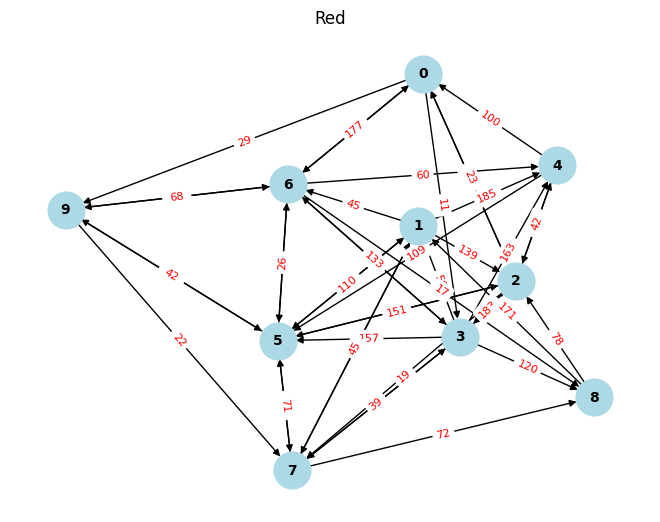

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

def visualizar_red(df):
    """
    Visualiza una red  representada en un DataFrame como un grafo.
    
    Args:
        df (pd.DataFrame): DataFrame con columnas ['origen', 'destino', 'costo'].
    """
    # Crear un grafo dirigido
    G = nx.DiGraph()
    
    # Añadir arcos y sus costos
    for _, row in df.iterrows():
        G.add_edge(row['origen'], row['destino'], weight=row['costo'])
    
    # Obtener las posiciones de los nodos usando un layout
    pos = nx.spring_layout(G)  # Layout automático para mejor visualización
    
    # Dibujar nodos y arcos
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold')
    
    # Extraer pesos para etiquetar los arcos
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red')
    
    # Mostrar el grafo
    plt.title("Red")
    plt.show()

# Generar dataset de ejemplo
dataset = generar_red(num_nodos=10, densidad=0.5, distancia_min=10, distancia_max=200, guardar_csv=True)

# Visualizar la red
visualizar_red(dataset)
